### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt


1. display 5 columns from dataset

In [23]:
#1
url = 'https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv'
data = pd.read_csv(url)
data.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [3]:
#2
data.info()

#conclusion The data has missing values in the race and admission column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [24]:
#3a
admission_counts = data['admission'].value_counts(dropna=False)

# Display the counts
print("Admission column:\n", admission_counts)



Admission column:
 admission
NaN         5194
Admit        900
Waitlist     100
Name: count, dtype: int64


In [6]:
#3b
race_counts = data['race'].value_counts(dropna=False)
print("\nRace column:\n", race_counts)


Race column:
 race
NaN         1842
White       1456
Asian       1147
Black        916
Hispanic     596
Other        237
Name: count, dtype: int64


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [9]:
#4
data['admission'].fillna('Deny', inplace=True)
data['race'].fillna('Other', inplace=True)

5. recheck missing value

In [8]:
#5
data.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [47]:
# 6
data.drop('application_id', axis=1, inplace=True)

7. show describe column and conclude what the insight is from that column

In [48]:
#7
data.describe()

#conclusion The GMAT and GPA have reasonable ranges. There is a significant variation in work experience among applicants.


,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


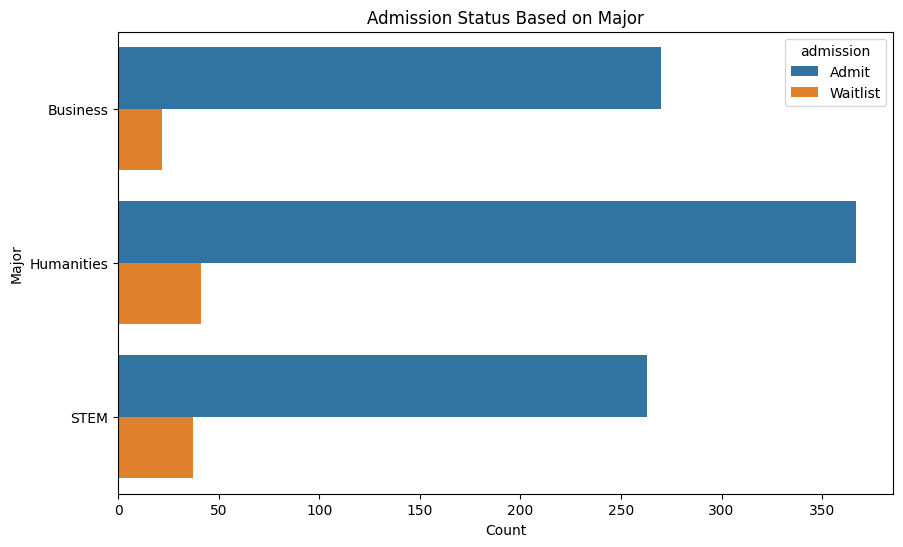

In [49]:
#8 Humanities majors likely have a larger number of applicants,
#  showing a relatively higher admission count compared to STEM and Business.
import seaborn as sns

# Modify the countplot to be horizontal
plt.figure(figsize=(10, 6))
sns.countplot(y='major', hue='admission', data=data)
plt.title('Admission Status Based on Major')
plt.xlabel('Count')
plt.ylabel('Major')
plt.show()



9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


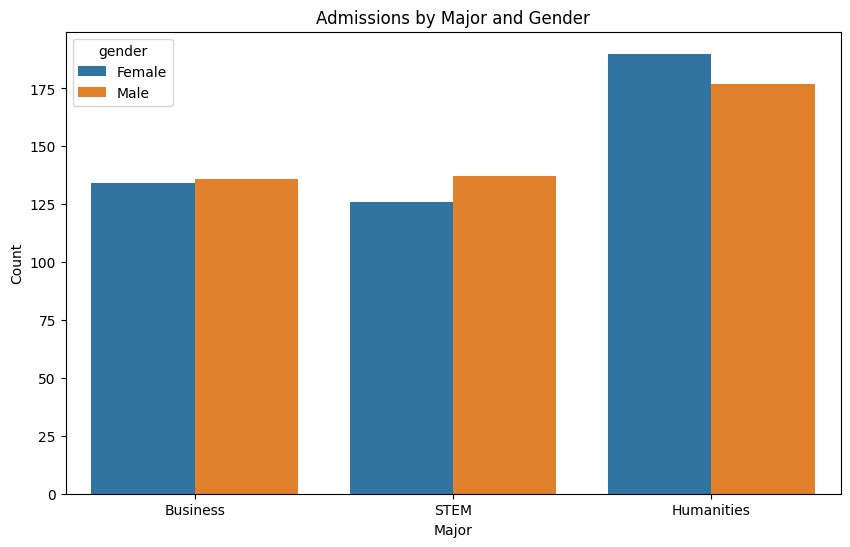

In [50]:
#9 STEM majors might have more male applicants being admitted,
# while Humanities might show a higher admission rate for female applicants.
# Business major showing almost the same number for the male and female applicant.
plt.figure(figsize=(10, 6))
sns.countplot(x='major', hue='gender', data=data[data['admission'] == 'Admit'])
plt.title('Admissions by Major and Gender')
plt.xlabel('Major')
plt.ylabel('Count')
plt.show()



10. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


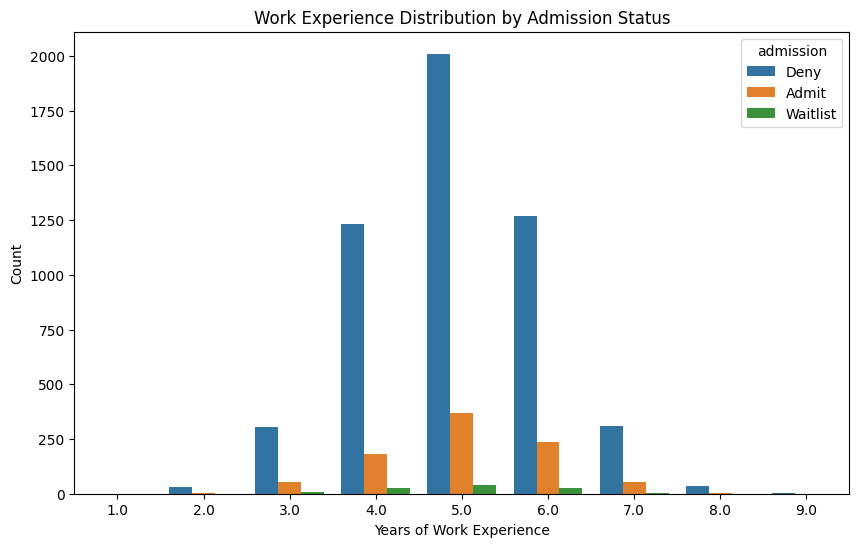

In [19]:
#10 The most accepted aplicant by the years of working experience is 5 years of working experience
# Countplot for work experience by admission status
plt.figure(figsize=(10, 6))
sns.countplot(x='work_exp', hue='admission', data=data)
plt.title('Work Experience Distribution by Admission Status')
plt.xlabel('Years of Work Experience')
plt.ylabel('Count')
plt.show()



11. create your own insightful visualization and explain it in at least 2 sentences

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

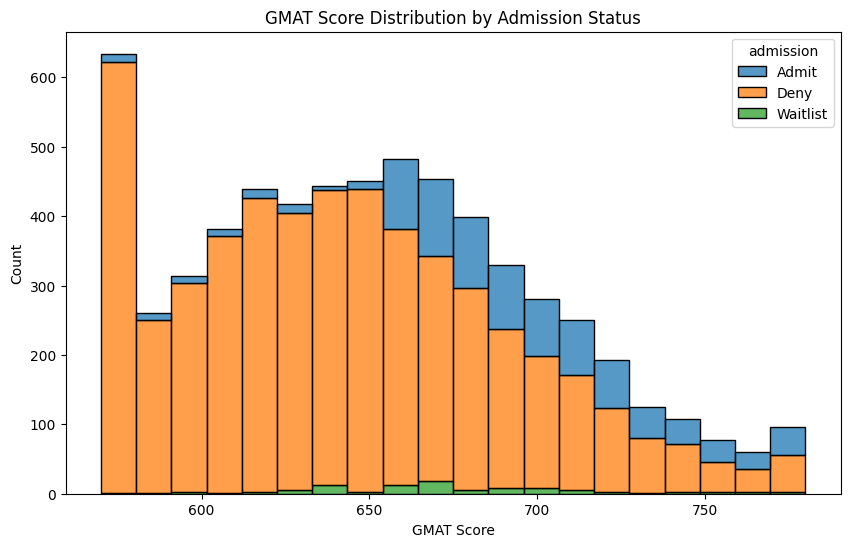

In [21]:
#11 The higher you got the GMAT Score, also higher chance that you get accepted
# GMAT score distribution by admission status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='gmat', hue='admission', multiple='stack', bins=20)
plt.title('GMAT Score Distribution by Admission Status')
plt.xlabel('GMAT Score')
plt.ylabel('Count')
plt.show()


12. encode categorical columns and display the results

In [53]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

# Creating a copy of the dataset to apply encoding
encoded_data = data.copy()

# List of columns to encode (only for x)
x_cols = ['gender', 'international', 'major', 'race', 'work_industry']

# Applying Label Encoding to each selected column
label_encoders = {}
for col in x_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))  # Convert NaN to string for encoding
    label_encoders[col] = le  # Storing the encoder for future reference

# Display the first 5 rows of the encoded dataset for the selected columns
X = encoded_data[x_cols]  # X contains the encoded feature columns
encoded_data.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,NaN
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,NaN
4,1,0,3.35,2,2,590.0,5.0,1,NaN


In [54]:
#12b
#encode y

# Encoding the 'admission' column (as the target variable, y)
le_admission = LabelEncoder()
encoded_data['admission'] = le_admission.fit_transform(encoded_data['admission'].astype(str))  # Convert NaN to string for encoding

# Display the first 5 rows of the encoded 'admission' column
y = encoded_data['admission']
encoded_data.head()


,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,0
1,1,0,3.28,1,1,680.0,5.0,6,2
2,0,1,3.30,0,5,710.0,5.0,13,0
3,1,0,3.47,2,1,690.0,6.0,13,2
4,1,0,3.35,2,2,590.0,5.0,1,2


13. create a heatmap to see the correlation and explain the conclusion

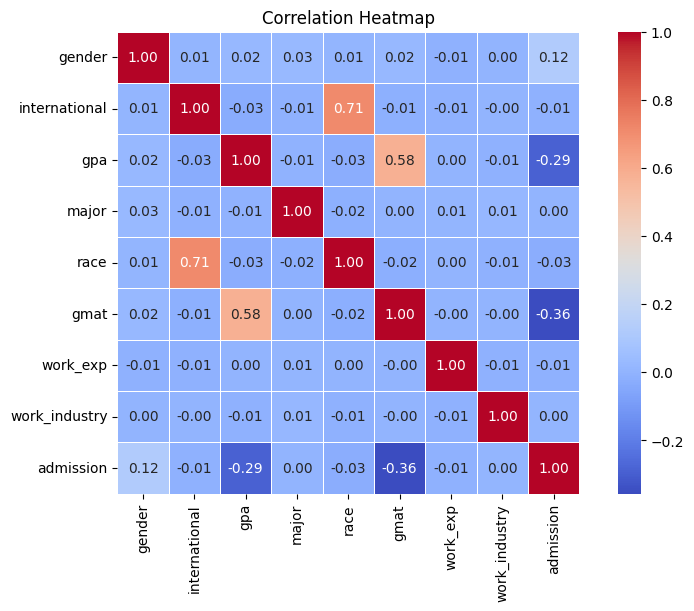

In [55]:
# Calculate the correlation matrix

correlation_matrix = encoded_data.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [76]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Random Forest model and fit it to the training data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Calculate average GPA for Lisa's prediction
average_gpa = data['gpa'].mean()

# Create Lisa's DataFrame
lisa_data = pd.DataFrame({
    'gender': [0],  # Assuming Female is encoded as 0
    'international': [0],  # Local student
    'gpa': [average_gpa],
    'major': [2],  # Assuming 'Entrepreneurship' corresponds to an index
    'race': [3],  # Assuming 'Asian' corresponds to an index
    'gmat': [580],  # Lisa's GMAT score
    'work_industry': [6]  # Assuming 'Finance' corresponds to an index
})

# Scale Lisa's Data
lisa_data_scaled = scaler.transform(lisa_data[x_cols])

# Make the prediction for Lisa
lisa_prediction = model.predict(lisa_data_scaled)
predicted_admission = le_admission.inverse_transform(lisa_prediction)
print(f"Lisa's predicted admission status: {predicted_admission[0]}")

Model Accuracy: 0.82


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- gmat
- gpa
- work_exp
